<a href="https://colab.research.google.com/github/Lukman289/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Modul_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

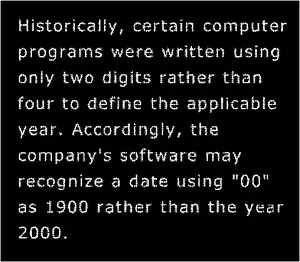

In [2]:
img1 = cv2.imread('/content/drive/MyDrive/Kuliah /Semester 5/Pengolahan Citra dan Visi Komputer/img/morphology.png')

cv2_imshow(img1)

**3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)**

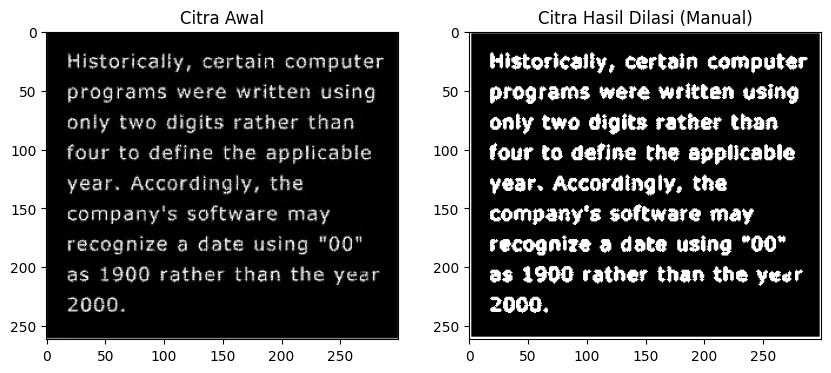

In [27]:
# Nomor 3
def dilate_manual(image, kernel):
    dilated_image = np.zeros_like(image)
    pad = kernel.shape[0] // 2
    padded_image = np.pad(image, pad, mode='constant')

    for i in range(pad, padded_image.shape[0] - pad):
        for j in range(pad, padded_image.shape[1] - pad):
            region = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            if np.any(region[kernel == 1]):
                dilated_image[i - pad, j - pad] = 255
    return dilated_image

# Structuring element berbentuk cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


_, img_binary = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY)

dilated_image = dilate_manual(img_binary, kernel)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Citra Hasil Dilasi (Manual)')
plt.show()


**4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)**

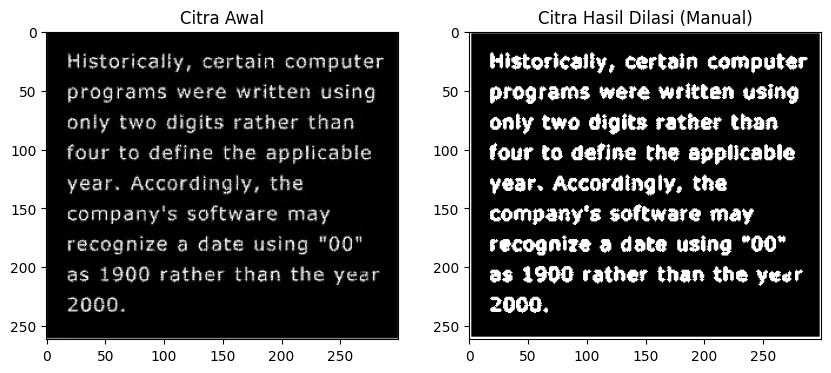

In [28]:
# Nomor 4
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


_, img_binary = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY)

dilated_image = cv2.dilate(img_binary, kernel)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Citra Hasil Dilasi (Manual)')
plt.show()


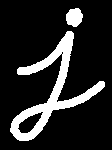

In [29]:
img2 = cv2.imread('/content/drive/MyDrive/Kuliah /Semester 5/Pengolahan Citra dan Visi Komputer/img/j.png', 0)

cv2_imshow(img2)

**5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

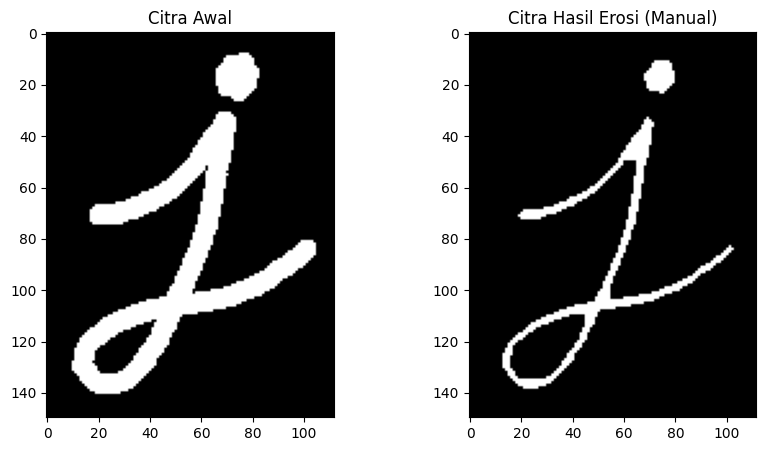

In [30]:
# Nomor 5
def erode_manual(image, kernel):
   # Ambil ukuran citra dan elemen penstrukturan
    img_h, img_w = image.shape
    se_h, se_w = kernel.shape

    # Tentukan padding
    pad_h = se_h // 2
    pad_w = se_w // 2

    # Buat citra output dan citra padded
    eroded_image = np.zeros_like(image)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Operasi erosi
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Sub-citra sesuai ukuran SE
            sub_image = padded_image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            # Jika semua piksel sub-citra sesuai dengan elemen penstrukturan (semua 1), maka erosi di (i,j) adalah 1
            if np.all(sub_image == kernel):
                eroded_image[i-pad_h, j-pad_w] = 1

    return eroded_image

# Structuring element berbentuk square 5x5
kernel = np.ones((5, 5), dtype=np.uint8)

binary_img2 = (img2 > 127).astype(np.uint8)
eroded_image = erode_manual(binary_img2, kernel)


plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi (Manual)')
plt.show()


**6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

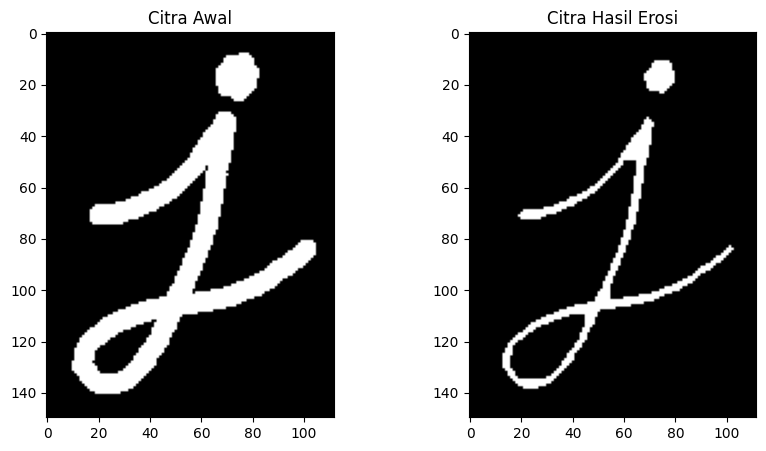

In [31]:
# Nomor 6
_, img_binary = cv2.threshold(img2, 128, 255, cv2.THRESH_BINARY)

eroded_image = cv2.erode(img_binary, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

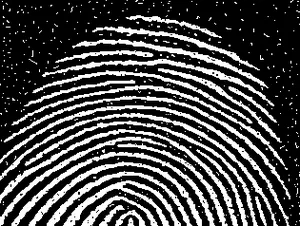

In [8]:
img3 = cv2.imread('/content/drive/MyDrive/Kuliah /Semester 5/Pengolahan Citra dan Visi Komputer/img/fingerprint.png', 0)

cv2_imshow(img3)

**7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)**

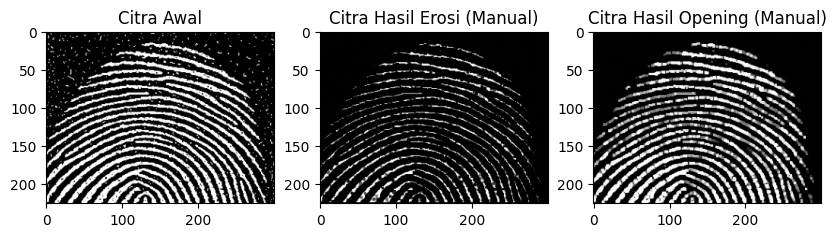

In [23]:
# Nomor 7

## Manual / tanpa menggunakan library
def erosi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_erosi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_erosi[i,j] = np.min(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]])

  return img_erosi

def dilasi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_dilasi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_dilasi[i,j] = np.max(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]]+mask)
  return img_dilasi


kernel = np.ones((3,3),np.uint8)
img_opening = erosi_manual(img3,kernel,1)
res_opening = dilasi_manual(img_opening,kernel,1)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img3, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(img_opening, cmap='gray'), plt.title('Citra Hasil Erosi (Manual)')
plt.subplot(133), plt.imshow(res_opening, cmap='gray'), plt.title('Citra Hasil Opening (Manual)')
plt.show()

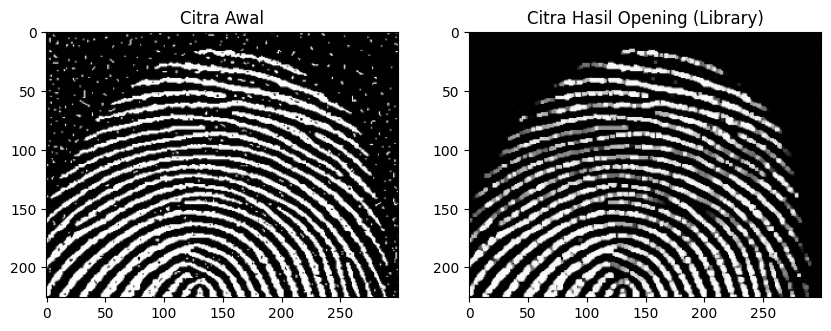

In [24]:
## Menggunakan library morphology

opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img3, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Opening (Library)')
plt.show()

**8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)**

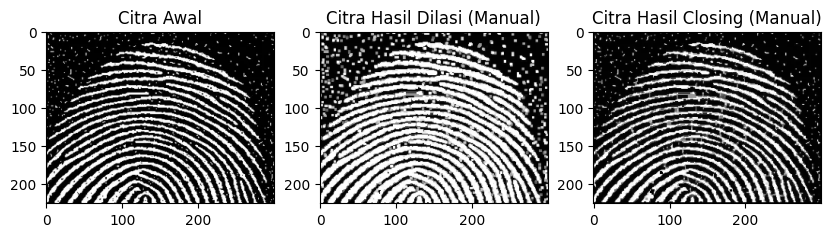

In [57]:
# Nomor 8

## Manual / tanpa menggunakan library
def erosi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_erosi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_erosi[i,j] = np.min(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]])

  return img_erosi

def dilasi_manual(img,mask,padding):
  img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)
  img_dilasi = np.zeros((img.shape),np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      img_dilasi[i,j] = np.max(img_padded[i:i+mask.shape[0],j:j+mask.shape[1]]+mask)
  return img_dilasi


kernel = np.ones((3,3),np.uint8)
img_closing = dilasi_manual(img3,kernel,1)
res_closing = erosi_manual(img_closing,kernel,1)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(img3, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(img_closing, cmap='gray'), plt.title('Citra Hasil Dilasi (Manual)')
plt.subplot(133), plt.imshow(res_closing, cmap='gray'), plt.title('Citra Hasil Closing (Manual)')
plt.show()

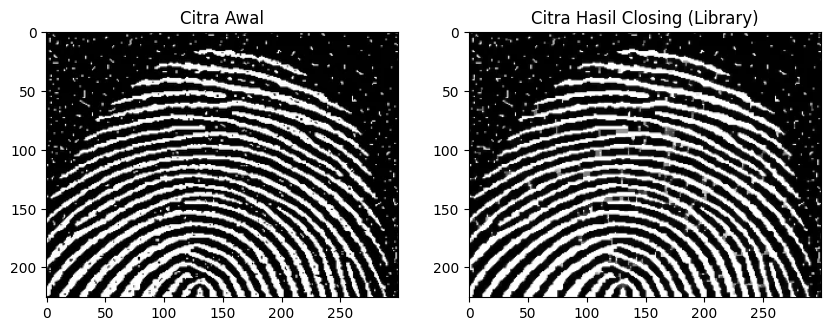

In [56]:
## Menggunakan library morphology

opening = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img3, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Citra Hasil Closing (Library)')
plt.show()

**9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

SED = Cross 3


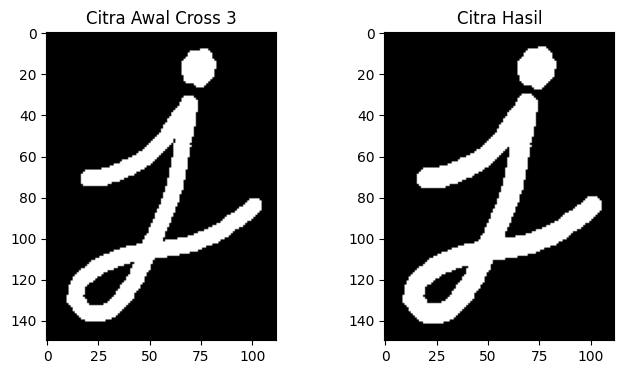

SED = Cross 5


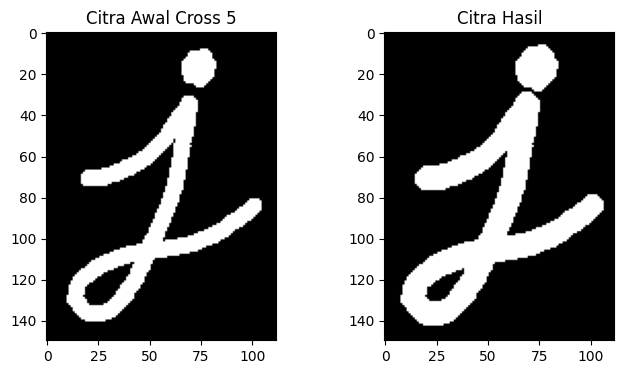

In [86]:
kernel1_cross = np.array([[0,1,0],
                          [1,0,1],
                          [0,1,0]], dtype=np.uint8)

kernel2_cross = np.array([[0,0,1,0,0],
                          [0,0,1,0,0],
                          [1,1,1,1,1],
                          [0,0,1,0,0],
                          [0,0,1,0,0]], dtype=np.uint8)

dilated_img1 = cv2.dilate(img2, kernel1_cross)
dilated_img2 = cv2.dilate(img2, kernel2_cross)

plt.figure(figsize=(8, 4))
print('SED = Cross 3')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Cross 3')
plt.subplot(122), plt.imshow(dilated_img1, cmap='gray'), plt.title('Citra Hasil')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Cross 5')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Cross 5')
plt.subplot(122), plt.imshow(dilated_img2, cmap='gray'), plt.title('Citra Hasil')
plt.show()

**10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3  dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

SED = Circular 3


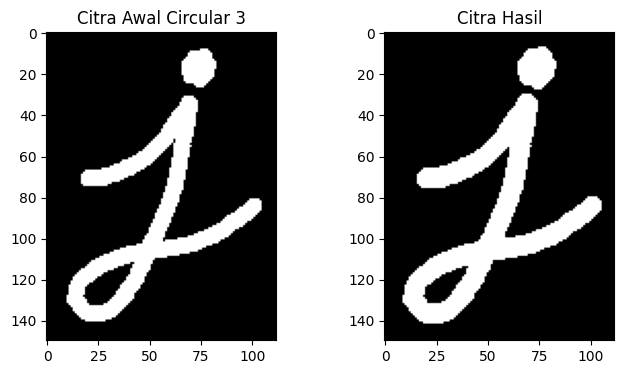

SED = Circular 5


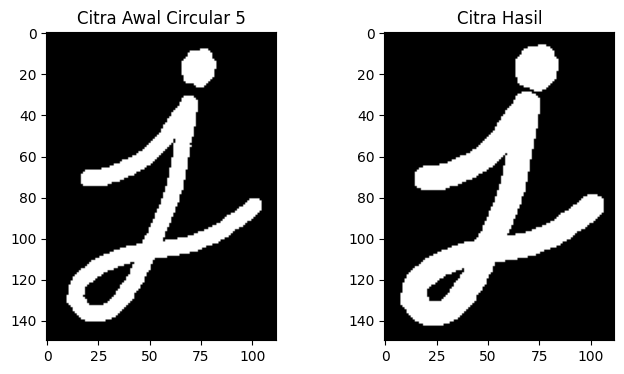

In [83]:
# Structuring Element Ellipse 3x3
kernel1_circluar = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Structuring Element Ellipse 5x5
kernel2_circluar = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# kernel1_circluar = np.array([[1,1,1],
#                     [1,0,1],
#                     [1,1,1]], dtype=np.uint8)

# kernel2_circluar = np.array([[1,1,1,1,1],
#                     [1,0,0,0,1],
#                     [1,0,0,0,1],
#                     [1,0,0,0,1],
#                     [1,1,1,1,1]], dtype=np.uint8)

dilated_img1 = cv2.dilate(img2, kernel1_circluar)
dilated_img2 = cv2.dilate(img2, kernel2_circluar)

plt.figure(figsize=(8, 4))
print('SED = Circular 3')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Circular 3')
plt.subplot(122), plt.imshow(dilated_img1, cmap='gray'), plt.title('Citra Hasil')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Circular 5')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Circular 5')
plt.subplot(122), plt.imshow(dilated_img2, cmap='gray'), plt.title('Citra Hasil')
plt.show()

**11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5  dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

SED = Rectangle 3


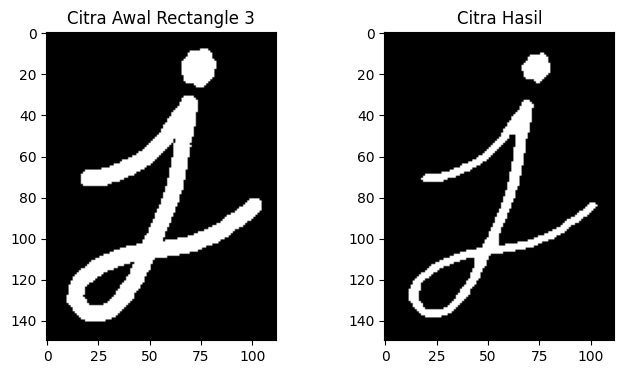

SED = Rectangle 5


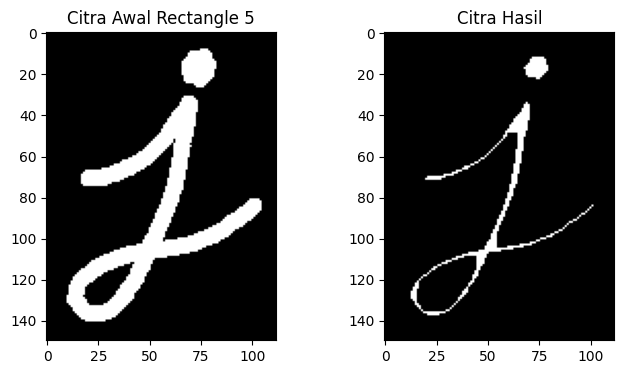

In [84]:
# Structuring Element Rectangle 3x3
kernel1_Rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))

# Structuring Element Rectangle 5x5
kernel2_Rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# kernel1_Rectangle = np.array([[1,1,1],
#                     [1,0,1],
#                     [1,1,1]], dtype=np.uint8)

# kernel2_Rectangle = np.array([[1,1,1,1,1],
#                     [1,0,0,0,1],
#                     [1,0,0,0,1],
#                     [1,0,0,0,1],
#                     [1,1,1,1,1]], dtype=np.uint8)

deroded_img1 = cv2.erode(img2, kernel1_Rectangle)
deroded_img2 = cv2.erode(img2, kernel2_Rectangle)

plt.figure(figsize=(8, 4))
print('SED = Rectangle 3')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Rectangle 3')
plt.subplot(122), plt.imshow(deroded_img1, cmap='gray'), plt.title('Citra Hasil')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Rectangle 5')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Rectangle 5')
plt.subplot(122), plt.imshow(deroded_img2, cmap='gray'), plt.title('Citra Hasil')
plt.show()

**12.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

SED = Line Vertical 3


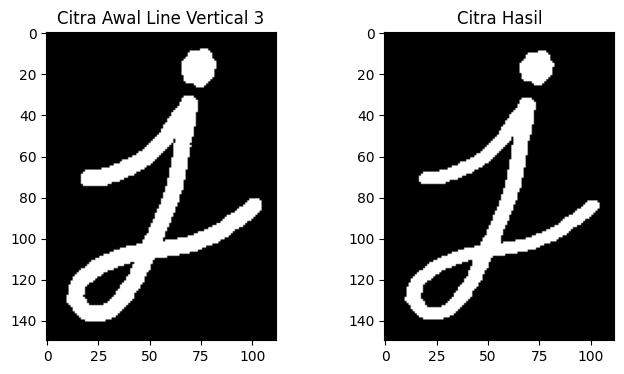

SED = Line Vertical 3


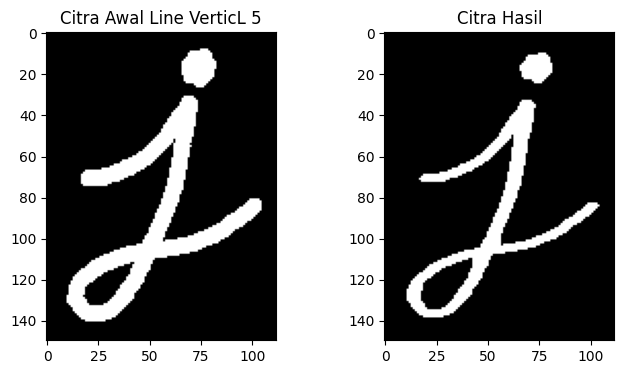

In [87]:
kernel1_vertical = np.array([[0,1,0],
                             [0,1,0],
                             [0,1,0]], dtype=np.uint8)

kernel2_vertical = np.array([[0,0,1,0,0],
                             [0,0,1,0,0],
                             [0,0,1,0,0],
                             [0,0,1,0,0],
                             [0,0,1,0,0]], dtype=np.uint8)

deroded_img1 = cv2.erode(img2, kernel1_vertical)
deroded_img2 = cv2.erode(img2, kernel2_vertical)

plt.figure(figsize=(8, 4))
print('SED = Line Vertical 3')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Line Vertical 3')
plt.subplot(122), plt.imshow(deroded_img1, cmap='gray'), plt.title('Citra Hasil')
plt.show()

plt.figure(figsize=(8, 4))
print('SED = Line Vertical 3')
plt.subplot(121), plt.imshow(img2, cmap='gray'), plt.title('Citra Awal Line VerticL 5')
plt.subplot(122), plt.imshow(deroded_img2, cmap='gray'), plt.title('Citra Hasil')
plt.show()